### Semantic Similarity

- object1.similarity(object2)

Uses

- For Recommendation systems
- Data Preprocessing 
> for removing duplicates

> use 'en_core_web_lg

In [7]:
import spacy
nlp = spacy.load('en_core_web_md')

In [8]:
doc1 = nlp('wolf')
doc2 = nlp('dog')

In [9]:
doc1.similarity(doc2)

0.5206573188004238

In [10]:
#Synonyms
doc3 = nlp('clever')
doc4 = nlp('smart')

In [11]:
doc3.similarity(doc4)

0.6583482458106189

In [21]:
doc_covid = nlp('food safely traded internationally transmission virus')
doc_covid

food safely traded internationally transmission virus

In [23]:
for token1 in doc_covid:
    for token2 in doc_covid:
        print('{:<20}:{:<20} :{:<20}'.format(token1.text, token2.text,token1.similarity(token2)))

food                :food                 :1.0                 
food                :safely               :0.27979347109794617 
food                :traded               :0.15414847433567047 
food                :internationally      :0.25375282764434814 
food                :transmission         :0.15381969511508942 
food                :virus                :0.18666549026966095 
safely              :food                 :0.27979347109794617 
safely              :safely               :1.0                 
safely              :traded               :0.17568489909172058 
safely              :internationally      :0.2529754638671875  
safely              :transmission         :0.1893715113401413  
safely              :virus                :0.2541821002960205  
traded              :food                 :0.15414847433567047 
traded              :safely               :0.17568489909172058 
traded              :traded               :1.0                 
traded              :internationally    

In [25]:
mylist = [(token1.text, token2.text, token1.similarity(token2)) for token1 in doc_covid for token2 in doc_covid]

In [26]:
mylist

[('food', 'food', 1.0),
 ('food', 'safely', 0.27979347),
 ('food', 'traded', 0.15414847),
 ('food', 'internationally', 0.25375283),
 ('food', 'transmission', 0.1538197),
 ('food', 'virus', 0.18666549),
 ('safely', 'food', 0.27979347),
 ('safely', 'safely', 1.0),
 ('safely', 'traded', 0.1756849),
 ('safely', 'internationally', 0.25297546),
 ('safely', 'transmission', 0.18937151),
 ('safely', 'virus', 0.2541821),
 ('traded', 'food', 0.15414847),
 ('traded', 'safely', 0.1756849),
 ('traded', 'traded', 1.0),
 ('traded', 'internationally', 0.23741725),
 ('traded', 'transmission', 0.09407266),
 ('traded', 'virus', 0.0139025),
 ('internationally', 'food', 0.25375283),
 ('internationally', 'safely', 0.25297546),
 ('internationally', 'traded', 0.23741725),
 ('internationally', 'internationally', 1.0),
 ('internationally', 'transmission', 0.113163546),
 ('internationally', 'virus', 0.05843074),
 ('transmission', 'food', 0.1538197),
 ('transmission', 'safely', 0.18937151),
 ('transmission', 'trad

In [27]:
import pandas as pd

In [28]:
covid_df = pd.DataFrame(mylist, columns = ['Token1', 'Token2', 'Similarity'])
covid_df.head()

,Token1,Token2,Similarity
0,food,food,1.000000
1,food,safely,0.279793
2,food,traded,0.154148
3,food,internationally,0.253753
4,food,transmission,0.153820


In [34]:
covid_df[covid_df['Similarity'] > 0.2 ].sort_values(by = 'Similarity')

,Token1,Token2,Similarity
15,traded,internationally,0.237417
20,internationally,traded,0.237417
9,safely,internationally,0.252975
19,internationally,safely,0.252975
3,food,internationally,0.253753
18,internationally,food,0.253753
31,virus,safely,0.254182
11,safely,virus,0.254182
1,food,safely,0.279793
6,safely,food,0.279793


In [49]:
heat = covid_df[covid_df['Similarity'] > 0.2 ].sort_values(by = 'Similarity')[:12:2]

In [50]:
heat

,Token1,Token2,Similarity
15,traded,internationally,0.237417
9,safely,internationally,0.252975
3,food,internationally,0.253753
31,virus,safely,0.254182
1,food,safely,0.279793
29,transmission,virus,0.340763


In [51]:
heat = heat.replace({'traded': 0, 'internationally': 1, 'safely':2, 'food': 3, 'virus': 4, 'transmission':5})

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
heat.corr()

,Token1,Token2,Similarity
Token1,1.000000,0.778056,0.747390
Token2,0.778056,1.000000,0.949477
Similarity,0.747390,0.949477,1.000000


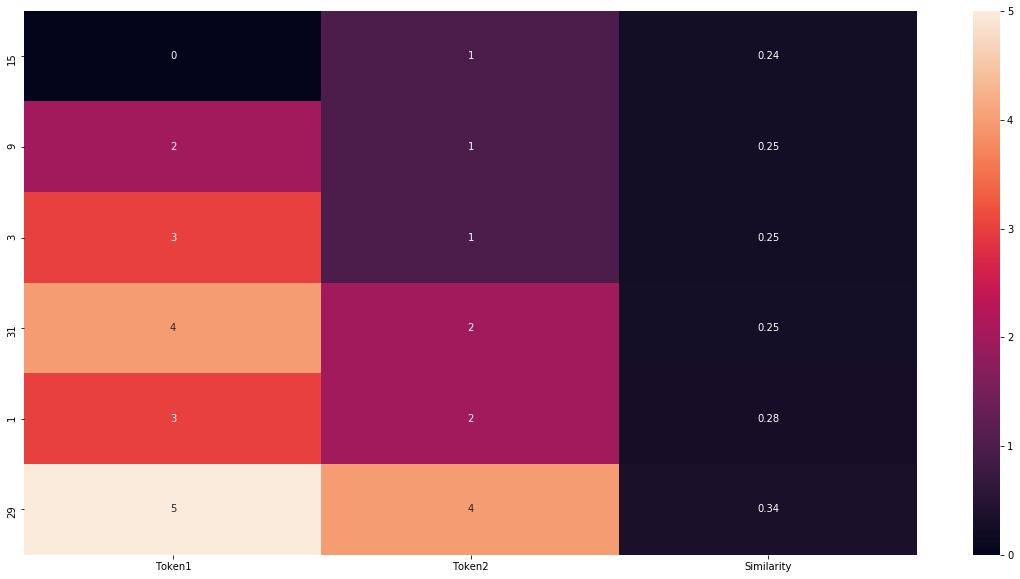

In [56]:
plt.figure(figsize = (20, 10))
sns.heatmap(heat, annot = True)